<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3 - Central Limit Theorem

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualise the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
house_hold_csv = "Family_Income_and_Expenditure.csv"
# Read CSV
house_hold_data = pd.read_csv(house_hold_csv)


In [11]:
 print(house_hold_data.head(10))



   Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   
5                  152883    CAR                   73326   
6                  198621    CAR                  104644   
7                  134961    CAR                   95644   
8                  171152    CAR                   67348   
9                  625753    CAR                  158721   

        Main Source of Income  Agricultural Household indicator  \
0               Wage/Salaries                                 0   
1               Wage/Salaries                                 0   
2               Wage/Salaries                                 1   
3               Wage/Salaries                                 0   
4   

In [13]:
 print(house_hold_data.tail(10))




       Total Household Income              Region  Total Food Expenditure  \
41534                  130950  XII - SOCCSKSARGEN                   76933   
41535                  166600  XII - SOCCSKSARGEN                   90786   
41536                  185100  XII - SOCCSKSARGEN                   87008   
41537                   72000  XII - SOCCSKSARGEN                   56760   
41538                  130636  XII - SOCCSKSARGEN                   81469   
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
41534               Wage/Salaries                                 2   
41535     

In [15]:
print("Shape of the dataset:", house_hold_data.shape)


Shape of the dataset: (41544, 60)


In [17]:
print("Data types of each column:")
print(house_hold_data.dtypes)


Data types of each column:
Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expendit

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

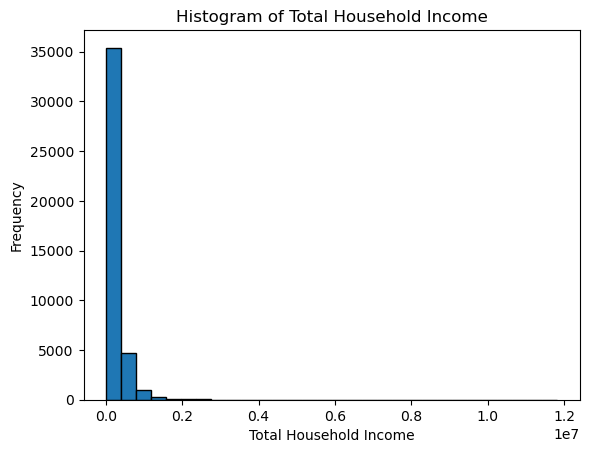

In [19]:
# ANSWER
plt.hist(house_hold_data['Total Household Income'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Frequency')
plt.show()


##### 2. How would you describe the shape of this population?

**ANSWER:**


##### 2. What is the mean income of this population?

In [25]:
mean_income = house_hold_data['Total Household Income'].mean()
print("Mean Total Household Income:", mean_income)


Mean Total Household Income: 247555.58480165608


##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

In [27]:
# ANSWER
sample = house_hold_data['Total Household Income'].dropna().sample(n=100, random_state=42)
sample_mean = sample.mean()
print("Sample Mean of Total Household Income:", sample_mean)


Sample Mean of Total Household Income: 257648.54


**ANSWER:**


#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5.

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [33]:
# ANSWER
sample_means = []

for _ in range(10):
    sample = house_hold_data['Total Household Income'].dropna().sample(n=5, random_state=np.random.randint(0, 10000))
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
print("Sample Means:", sample_means)
print("Center of the Distribution of Sample Means:", np.mean(sample_means))


Sample Means: [150555.8, 204440.6, 454400.6, 139026.6, 123564.6, 179157.4, 150244.8, 200181.6, 218821.8, 124310.4]
Center of the Distribution of Sample Means: 194470.41999999998


###### 4.A Make a histogram of all the sample means

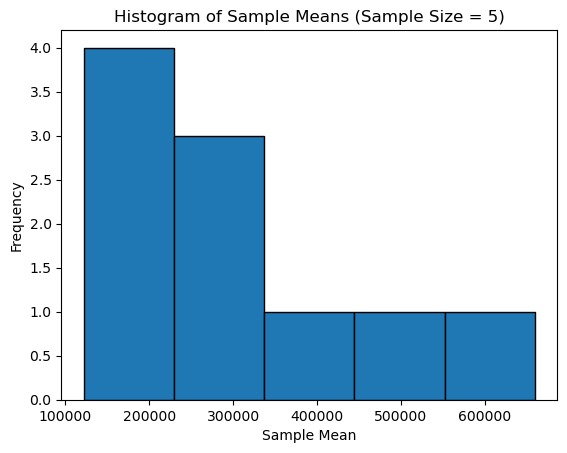

In [31]:
# ANSWER
plt.hist(sample_means, bins=5, edgecolor='k')
plt.title('Histogram of Sample Means (Sample Size = 5)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()




###### 4.B Describe the shape of the histogram.

**ANSWER:**


##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [43]:
# ANSWER
for _ in range(1000):
    sample = house_hold_data['Total Household Income'].dropna().sample(n=15, random_state=np.random.randint(0, 10000))
    sample_mean = sample.mean()
    sample_means.append(sample_mean)


##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [47]:
# ANSWERsample_means = []

ample_means = []

for _ in range(1000):
    sample = house_hold_data['Total Household Income'].dropna().sample(n=50, random_state=np.random.randint(0, 10000))
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
print("Center of the Distribution of Sample Means:", np.mean(sample_means))






Center of the Distribution of Sample Means: 247112.40332333336


###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

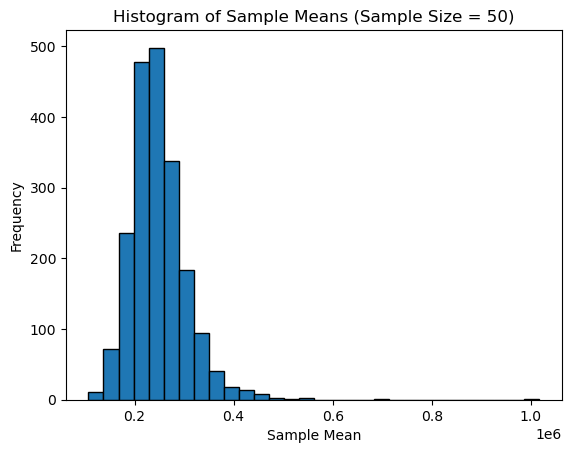

In [50]:
plt.hist(sample_means, bins=30, edgecolor='k')
plt.title('Histogram of Sample Means (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

**ANSWER:**


###### 8.B What is mean of the distribution of sample means?

In [54]:
# ANSWER
mean_of_sample_means = np.mean(sample_means)
print("Mean of the Distribution of Sample Means (Sample Size = 15):", mean_of_sample_means)


Mean of the Distribution of Sample Means (Sample Size = 15): 247112.40332333336


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**





---



---



> > > > > > > > > © 2024 Institute of Data


---



---



